# Tugas Proyek Akhir (Capstone Project)
**Judul Proyek**

Analisis Sentimen Ulasan Brand Erigo di Tokopedia

**Deskripsi Proyek**

Proyek ini bertujuan untuk melakukan **analisis sentimen** terhadap ulasan pelanggan produk *Erigo* di platform e-commerce **Tokopedia**. Proyek ini membantu memahami **persepsi pelanggan** terhadap produk dan layanan yang ditawarkan, sehingga dapat memberikan wawasan strategis untuk meningkatkan kualitas dan kepuasan pelanggan.

## Kelompok 10
- Mochammad Rizky Ramadhani (1217050081)
- Muhammad Dzikri (1217050090)
- Sains Data A

## Install Library

In [1]:
!pip install nltk

In [2]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

## Data Collection

In [4]:
# Memuat data
url = 'https://drive.google.com/uc?id=1qrRkgJZIQLiX44RiUIepXCkGFFjfwhUt'
df = pd.read_csv(url)
df.head()

,Ulasan,Rating
0,Size L standr indonesia jadi kegedean,bintang 5
1,Ukuran L nya kegedean. Size L standar indo,bintang 5
2,Bahan kain bagus dan enak dipakai makasih sell...,bintang 5
3,"pantes murah, bahannya gak nyerap keringet heh...",bintang 3
4,"modelnya keren,pas di badan,nyaman di pakai ba...",bintang 5


In [5]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ulasan  2479 non-null   object
 1   Rating  2479 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


## Data Cleaning

In [6]:
df.shape

(2479, 2)

In [7]:
# Menghapus duplikasi dan cek missing values
df = df.drop_duplicates(subset=['Ulasan'])

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

,0
Ulasan,0
Rating,0


In [10]:
df.shape

(1186, 2)

In [11]:
# Fungsi untuk membersihkan teks
def clean_data(text):
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [12]:
# Membersihkan teks pada kolom 'Ulasan'
df['Ulasan'] = df['Ulasan'].apply(clean_data)
df['Ulasan'] = df['Ulasan'].str.lower()

## Data Preprocessing

### Normalisasi Teks

In [13]:
# Normalisasi kata-kata umum
norm = {
    " yg ": " yang ", " expetasi ": " ekspektasi ", " udh ": " sudah ", " bgt ": " banget ",
    " gg ": " keren ", " bgtt ": " banget ", " jd ": " jadi ", " skrg ": " sekarang ",
    " lakai ": " pakai ", " pjg ": " panjang ", " b ": " biasa ", " co ": " checkout ",
    " blm ": " belum ", " trs ": " terus ", " bnyk ": " banyak ", " gk ": " gak ", " gitu ": " begitu ",
    " tmn ": " teman ", " ajah ": " saja ", " wktu ": " waktu ", " nnti ": " nanti ", " sm ": " sama ",
    " hrs ": " harus ", " spatu ": " sepatu ", " tmbah ": " tambah ", " gmn ": " gimana ", " nyaa ": " nya ",
    " blg ": " bilang ", " bgtu ": " begitu ", " jdnya ": " jadinya ", " aq ": " aku ", " mw ": " mau ",
    " gpp ": " gak papa ", " q ": " aku ", " sdh ": " sudah ", " mnrt ": " menurut ", " smua ": " semua ",
    " trima ": " terima ", " pls ": " please ", " plg ": " pulang ", " ndak ": " tidak ", " krn ": " karena ",
    " btul ": " betul ", " bs ": " bisa ", " cpt ": " cepat ", " brg ": " barang ", " sndiri ": " sendiri ",
    " sj ": " saja ", " ptg ": " penting ", " dh ": " sudah ", " size l ": " ukuran L standar Indonesia ",
    " l ": " L ", " bintang 5 ": " 5 bintang ", " murah ": " harga murah ", " kain bagus ": " bahan kain bagus ",
    " standr ": " standar ", " ntah ": " entah ", " knp ": " kenapa ", " tp ": " tapi ", " dgn ": " dengan ",
    " dlm ": " dalam ", " kl ": " kalau ", " pd ": " pada ", " lg ": " lagi ", " sy ": " saya ",
    " kamu ": " anda ", " ku ": " saya ", " nya ": " nya ", " trs ": " terus ", " ni ": " ini ",
    " kt ": " kita ", " klo ": " kalau ", " kalo ": " kalau ", " kpn ": " kapan ", " dr ": " dari ",
    " yg ": " yang ", " mlm ": " malam ", " siang ": " siang ", " sore ": " sore ", " pgi ": " pagi ",
    " tks ": " terima kasih ", " thx ": " terima kasih ", " oke ": " baik ", " ok ": " baik ",
    " w ": " saya ", " ap ": " apa ", " br ": " baru ", " slh ": " salah ", " maaf ": " minta maaf ",
    " tau ": " tahu ", " mohon ": " minta ", " smp ": " sampai ", " ktmu ": " ketemu "
}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text


In [39]:
# Melakukan normalisasi pada kolom 'Ulasan'
df['Ulasan'] = df['Ulasan'].apply(lambda x: normalisasi(x))
df.head()

,Ulasan,Rating,Sentimen_Akhir
0,size L standar indonesia jadi kegedean,5,POSITIVE
1,ukuran L nya kegedean ukuran L standar Indonesia standar indo,5,POSITIVE
2,bahan bahan bahan kain bagus dan enak dipakai makasih seller makasih tokped,5,POSITIVE
3,pantes harga harga murah bahannya gak nyerap keringet hehetapi harga segini bisa dapet lebih bagus diseller lain sih hehe,3,NEGATIVE
4,modelnya kerenpas di badannyaman di pakai bahan nya tebal,5,POSITIVE


### Tokenisasi Teks

In [15]:
# Tokenisasi teks
tokenized = df['Ulasan'].apply(lambda x: x.split())
tokenized

,Ulasan
0,"[size, L, standar, indonesia, jadi, kegedean]"
1,"[ukuran, L, nya, kegedean, ukuran, L, standar,..."
2,"[bahan, bahan, kain, bagus, dan, enak, dipakai..."
3,"[pantes, harga, murah, bahannya, gak, nyerap, ..."
4,"[modelnya, kerenpas, di, badannyaman, di, paka..."
...,...
2468,"[warna, putih, agak, kuning, sebaiknya, down, ..."
2471,"[kerennnnnn, bro]"
2473,"[cocok, pokoknya, erigo, ini, beli, kedua, dg,..."
2476,"[bahannya, tdk, tipis, tpi, jga, tdk, terlalu,..."


### Stopwords Removal

In [16]:
# Install dan memuat stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian') + stopwords.words('english'))

def remove_stopwords(text_tokens):
    return [word for word in text_tokens if word.lower() not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
# Menghapus stopwords
tokenized = tokenized.apply(remove_stopwords)

### Stemming

In [18]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Fungsi stemming dengan proses ditampilkan
def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    do = []
    for w in text_cleaning:
        stemmed_word = stemmer.stem(w)
        print(f"Asli: {w} -> Stemmed: {stemmed_word}")  # Menampilkan proses stemming
        do.append(stemmed_word)

    d_clean = " ".join(do)
    return d_clean

# Menerapkan stemming
tokenized = tokenized.apply(stemming)


Output streaming akan dipotong hingga 5000 baris terakhir.
Asli: gak -> Stemmed: gak
Asli: kaya -> Stemmed: kaya
Asli: ksni -> Stemmed: ksni
Asli: jelek -> Stemmed: jelek
Asli: aja -> Stemmed: aja
Asli: kwalitas -> Stemmed: kwalitas
Asli: kainnya -> Stemmed: kain
Asli: sortir -> Stemmed: sortir
Asli: qc -> Stemmed: qc
Asli: ya -> Stemmed: ya
Asli: konveksin -> Stemmed: konveksin
Asli: gaada -> Stemmed: gaada
Asli: box -> Stemmed: box
Asli: plastik -> Stemmed: plastik
Asli: doang -> Stemmed: doang
Asli: karet -> Stemmed: karet
Asli: ga -> Stemmed: ga
Asli: ngaret -> Stemmed: ngaret
Asli: ga -> Stemmed: ga
Asli: kayak -> Stemmed: kayak
Asli: lengan -> Stemmed: lengan
Asli: jahitan -> Stemmed: jahit
Asli: rapih -> Stemmed: rapih
Asli: warna -> Stemmed: warna
Asli: kirim -> Stemmed: kirim
Asli: sesuai -> Stemmed: sesuai
Asli: pesanana -> Stemmed: pesanana
Asli: warna -> Stemmed: warna
Asli: baju -> Stemmed: baju
Asli: sesuaiwarna -> Stemmed: sesuaiwarna
Asli: gelap -> Stemmed: gelap
Asli: 

## Data Transformation

### Mengubah nilai rating

In [19]:
# Mengubah kolom 'Rating' dari string "bintang x" menjadi integer x
df['Rating'] = df['Rating'].astype(str).str.extract('(\d)').astype(int)
df.head()

,Ulasan,Rating
0,size L standar indonesia jadi kegedean,5
1,ukuran L nya kegedean ukuran L standar Indones...,5
2,bahan bahan kain bagus dan enak dipakai makasi...,5
3,pantes harga murah bahannya gak nyerap keringe...,3
4,modelnya kerenpas di badannyaman di pakai baha...,5


## Sentimen Analysis

### Melabeli Sentimen dengan model Bert-Base

In [20]:
# Memilih model analisis sentimen yang lebih sesuai
sentiment_model = pipeline("sentiment-analysis", model="cahya/bert-base-indonesian-1.5G")

# Pemetaan label analisis sentimen
label_map = {
    "LABEL_0": "NEGATIVE",
    "LABEL_1": "POSITIVE"
}

# Fungsi untuk menentukan sentimen akhir berdasarkan analisis sentimen dan rating
def determine_final_sentiment(ulasan, rating):
    sentiment_result = sentiment_model(ulasan)[0]
    sentiment_label = sentiment_result['label']

    if sentiment_label not in label_map:
        print(f"Label tidak dikenal: {sentiment_label}")
        return "NEGATIVE"

    sentiment = label_map[sentiment_label]

    # Menentukan sentimen akhir berdasarkan rating dan analisis sentimen
    if sentiment == "POSITIVE" and rating >= 4:
        return "POSITIVE"
    elif sentiment == "NEGATIVE" and rating <= 2:
        return "NEGATIVE"
    else:
        if rating >= 4:
            return "POSITIVE"
        elif rating <= 2:
            return "NEGATIVE"
        else:
            return "NEGATIVE"

# Menambahkan kolom 'Sentimen_Akhir' berdasarkan kombinasi rating dan analisis sentimen
df['Sentimen_Akhir'] = df.apply(
    lambda row: determine_final_sentiment(row['Ulasan'], row['Rating']), axis=1
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/468 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-base-indonesian-1.5G and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [21]:
# Menampilkan hasil
print(df.head())

                                              Ulasan  Rating Sentimen_Akhir
0             size L standar indonesia jadi kegedean       5       POSITIVE
1  ukuran L nya kegedean ukuran L standar Indones...       5       POSITIVE
2  bahan bahan kain bagus dan enak dipakai makasi...       5       POSITIVE
3  pantes harga murah bahannya gak nyerap keringe...       3       NEGATIVE
4  modelnya kerenpas di badannyaman di pakai baha...       5       POSITIVE


##  Data Visualization

### Bar Chart


Statistik Sentimen Akhir:
Sentimen_Akhir
POSITIVE    810
NEGATIVE    376
Name: count, dtype: int64


<ipython-input-22-c20d3686a08e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentimen_Akhir', data=df, palette='coolwarm')


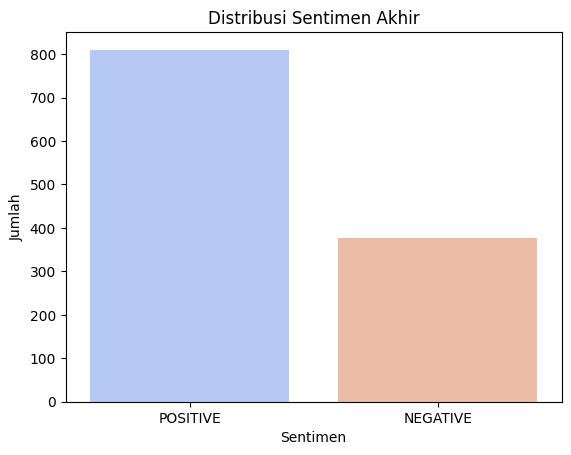

In [22]:
# Statistik sentimen akhir
print("\nStatistik Sentimen Akhir:")
print(df['Sentimen_Akhir'].value_counts())

# Visualisasi distribusi sentimen akhir
sns.countplot(x='Sentimen_Akhir', data=df, palette='coolwarm')
plt.title('Distribusi Sentimen Akhir')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

### Words Cloud

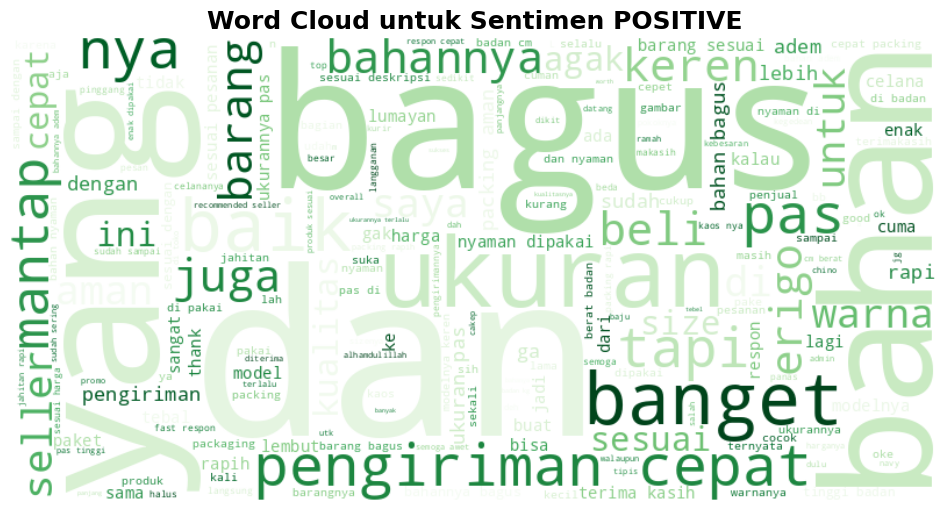

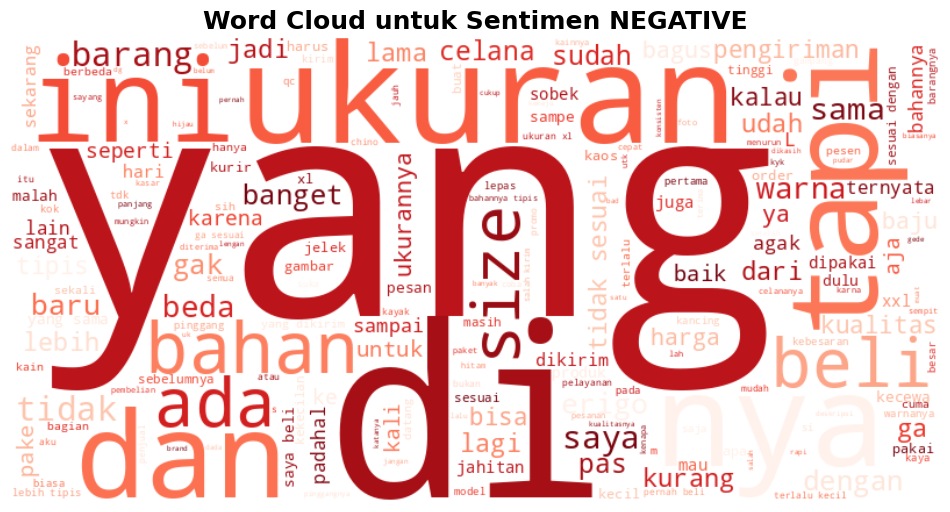

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word Cloud untuk Sentimen POSITIVE
positive_reviews = " ".join(df[df['Sentimen_Akhir'] == "POSITIVE"]['Ulasan'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_reviews)

plt.figure(figsize=(12, 8))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud untuk Sentimen POSITIVE', fontsize=18, fontweight='bold')
plt.axis('off')
plt.show()

# Word Cloud untuk Sentimen NEGATIVE
negative_reviews = " ".join(df[df['Sentimen_Akhir'] == "NEGATIVE"]['Ulasan'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_reviews)

plt.figure(figsize=(12, 8))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud untuk Sentimen NEGATIVE', fontsize=18, fontweight='bold')
plt.axis('off')
plt.show()


### Pie Chart

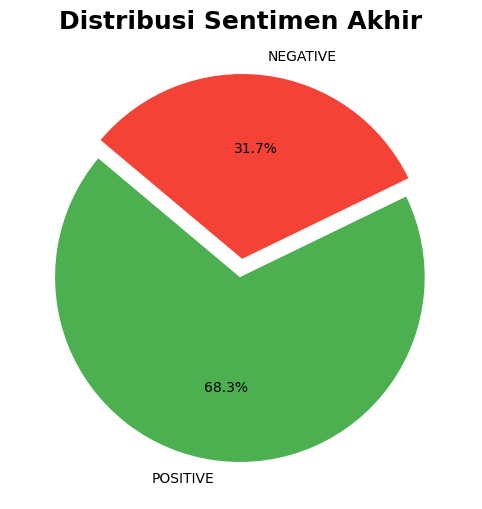

In [24]:
# Menghitung jumlah masing-masing sentimen
sentiment_counts = df['Sentimen_Akhir'].value_counts()

# Warna untuk masing-masing sentimen
colors = ['#4CAF50', '#F44336']  # Hijau untuk positif, merah untuk negatif

# Membuat Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05, 0.05))
plt.title('Distribusi Sentimen Akhir', fontsize=18, fontweight='bold')
plt.show()


## Prediksi Dengan Model Machine Learning


Logistic Regression
              precision    recall  f1-score   support

    NEGATIVE       0.79      0.42      0.55        74
    POSITIVE       0.78      0.95      0.86       164

    accuracy                           0.79       238
   macro avg       0.79      0.69      0.70       238
weighted avg       0.79      0.79      0.76       238

Akurasi: 0.7857142857142857


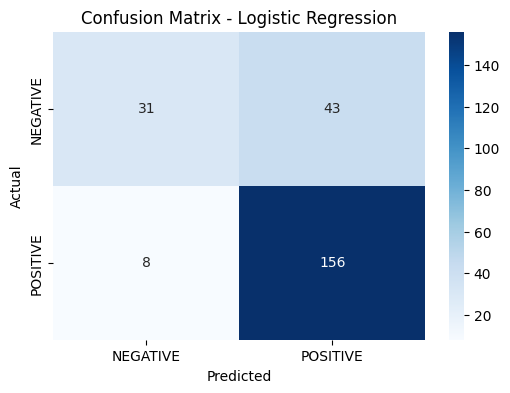


Support Vector Machine
              precision    recall  f1-score   support

    NEGATIVE       0.77      0.65      0.71        74
    POSITIVE       0.85      0.91      0.88       164

    accuracy                           0.83       238
   macro avg       0.81      0.78      0.79       238
weighted avg       0.83      0.83      0.83       238

Akurasi: 0.8319327731092437


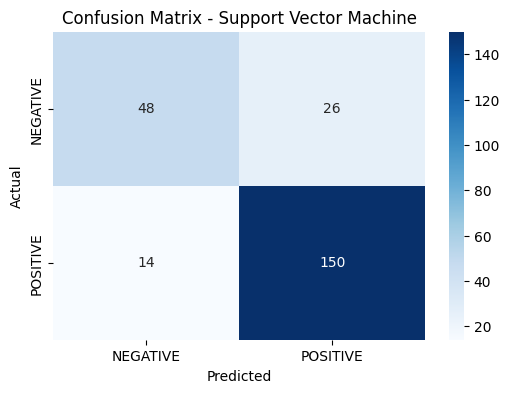


Random Forest
              precision    recall  f1-score   support

    NEGATIVE       0.72      0.59      0.65        74
    POSITIVE       0.83      0.90      0.86       164

    accuracy                           0.80       238
   macro avg       0.78      0.75      0.76       238
weighted avg       0.80      0.80      0.80       238

Akurasi: 0.8025210084033614


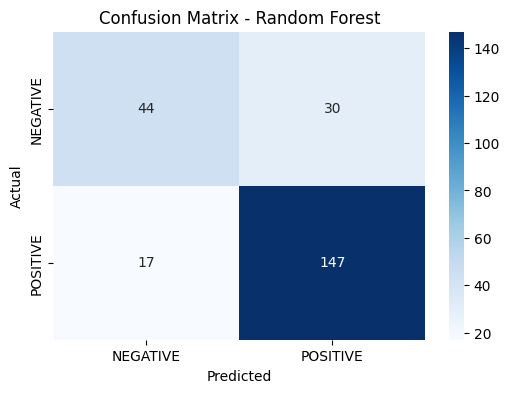

In [43]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menggunakan TF-IDF Vectorizer untuk representasi teks
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Ulasan'])
y = df['Sentimen_Akhir']

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Logistic Regression
model_lr = LogisticRegression(max_iter=500, random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Logistic Regression Results
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("Akurasi:", accuracy_score(y_test, y_pred_lr))

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=["NEGATIVE", "POSITIVE"], yticklabels=["NEGATIVE", "POSITIVE"])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Support Vector Machine
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

# Support Vector Machine Results
print("\nSupport Vector Machine")
print(classification_report(y_test, y_pred_svm))
print("Akurasi:", accuracy_score(y_test, y_pred_svm))

# Confusion Matrix for Support Vector Machine
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=["NEGATIVE", "POSITIVE"], yticklabels=["NEGATIVE", "POSITIVE"])
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Random Forest Results
print("\nRandom Forest")
print(classification_report(y_test, y_pred_rf))
print("Akurasi:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["NEGATIVE", "POSITIVE"], yticklabels=["NEGATIVE", "POSITIVE"])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Testing kalimat untuk prediksi Sentimen

In [54]:
test_input = ["bahannya lumayan bagus untuk harga segini ntar liat dulu kalo ga gampang luntur bakal order lagi"]
test_vectorized = vectorizer.transform(test_input)
print("Sentimen:", model_svm.predict(test_vectorized))


Sentimen: ['POSITIVE']
